# EDA on the Jigsaw Toxic Comments Data Set

In [32]:
library(ggplot2, warn.conflicts = FALSE, quietly = TRUE) # Data visualization
library(readr, quietly = TRUE) # CSV file I/O, e.g. the read_csv function
library(dplyr, warn.conflicts = FALSE, quietly = TRUE)
library(tidyr, quietly = TRUE)

system("ls ../input")
train <- read_csv("../input/train.csv")

Parsed with column specification:
cols(
  id = col_double(),
  comment_text = col_character(),
  toxic = col_double(),
  severe_toxic = col_double(),
  obscene = col_double(),
  threat = col_double(),
  insult = col_double(),
  identity_hate = col_double()
)


## Peak at the data

In [34]:
head(train)
print("Shape of the data: ")
print(dim(train))

id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
22256635,"Nonsense? kiss off, geek. what I said is true. I'll have your account terminated.",1,0,0,0,0,0
27450690,""" Please do not vandalize pages, as you did with this edit to W. S. Merwin. If you continue to do so, you will be blocked from editing. """,0,0,0,0,0,0
54037174,""" """"Points of interest"""" I removed the """"points of interest"""" section you added because it seemed kind of spammy. I know you probably didn't mean to disobey the rules, but generally, a point of interest tends to be rather touristy, and quite irrelevant to an area culture. That's just my opinion, though. If you want to reply, just put your reply here and add {{talkback|Jamiegraham08}} on my talkpage. """,0,0,0,0,0,0
77493077,Asking some his nationality is a Racial offence. Wow wasn't aware of it. Blocking me has shown your support towards your community. Thanku for that,0,0,0,0,0,0
79357270,The reader here is not going by my say so for ethereal vocal style and dark lyrical content. The cited sources in the External Links are saying those things. If you feel the sources are unreliable or I did not represent what they said correctly rewrite or delete it.,0,0,0,0,0,0
82428052,Fried chickens Is dat sum fried chickens?,0,0,0,0,0,0


[1] "Shape of the data: "
[1] 95851     8


## Basic EDA on Target Variables

### Are there any comments that have more than one label?

In [35]:
library(reshape2, quietly = TRUE)
train_flat <- train %>% 
    melt(id.vars=c('id','comment_text'), variable.name = "label") 

print("Each row has a unique label")
print(train_flat %>% 
    select(comment_text) %>% 
    unique() %>% 
    nrow() == dim(train)[1])
## Nope, no duplicate labels

### Flatten the array to [comment_text, label]
train_flat <- train_flat %>% filter(value == 1) %>% select(comment_text, label)
head(train_flat)


[1] "Each row has a unique label"
[1] TRUE


comment_text,label
"Nonsense? kiss off, geek. what I said is true. I'll have your account terminated.",toxic
Why hasn't Alitalia been removed rom the alliance due to its piss-poor customer service? - Sentiments of nummerous FlyerTalkers,toxic
""" The Graceful Slick.... Is non other than an ungraceful dick!86.131.154.225 """,toxic
""" Stupid? As soon as I saw the phrase """"metal is stupid"""" at the very beginning of the article, I assumed I misread it. When I confirmed that it did indeed say """"metal is stupid,"""" I then assumed it was vandalism. However, I don't know anything about chemistry (See: Soviet education system) so if the word """"stupid"""" has some other meaning in chemistry, I would have no way of knowing or refuting it. Could someone that actually has some amount of knowledge on this subject confirm whether this is or is not vandalism or a typo or what-have-you? """,toxic
""" Ban one side of an argument by a bullshit nazi admin and you get no discussion because the islamist editors feel they """"won"""".""",toxic
Are you gay?? Sound like it,toxic


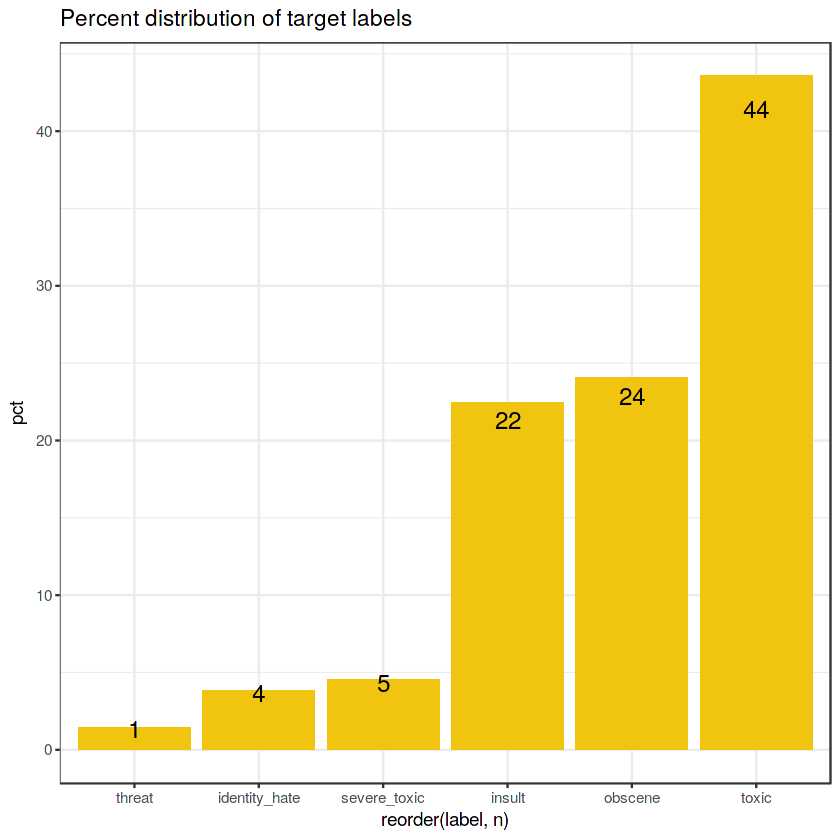

In [68]:
fillColor = "#F1C40F"
train_flat %>% 
    group_by(label) %>% 
    summarize(n= n()) %>%
    mutate(pct = n/sum(n) * 100) %>%
    arrange(desc(label)) %>%
ggplot(aes(x=reorder(label, n), y=pct, label=round(pct,0))) +  
geom_bar(stat='identity', fill=fillColor) + 
geom_text(size = 5, position = position_stack(vjust = .95))+
theme_bw()+
ggtitle("Percent distribution of target labels")

## Explore on a word by word basis

In [36]:
library(tidytext)
data("stop_words")
tidy_data <- train_flat %>% 
    unnest_tokens(word, comment_text) %>% 
    anti_join(stop_words) 

Joining, by = "word"


In [37]:
print(tidy_data %>% head())
print(dim(tidy_data))

  label       word
1 toxic   nonsense
2 toxic       kiss
3 toxic       geek
4 toxic       true
5 toxic    account
6 toxic terminated
[1] 522940      2


## Top Words Overall

In [38]:
tidy_data %>% 
group_by(word) %>% 
summarize(n=n()) %>% 
arrange(desc(n)) %>%
head(20)

word,n
fuck,22621
nigger,11178
ass,8805
suck,8188
shit,8045
fucking,7127
die,6263
cunt,4808
penis,4610
fat,4539


## Number of unique words per category ##

In [39]:
tidy_data %>% group_by(label) %>% unique() %>% tally() %>% arrange(desc(n))

label,n
toxic,25833
obscene,16822
insult,15428
identity_hate,5016
severe_toxic,4359
threat,1908


## Looking at the top words by category.. pretty ugly stuff

Selecting by n


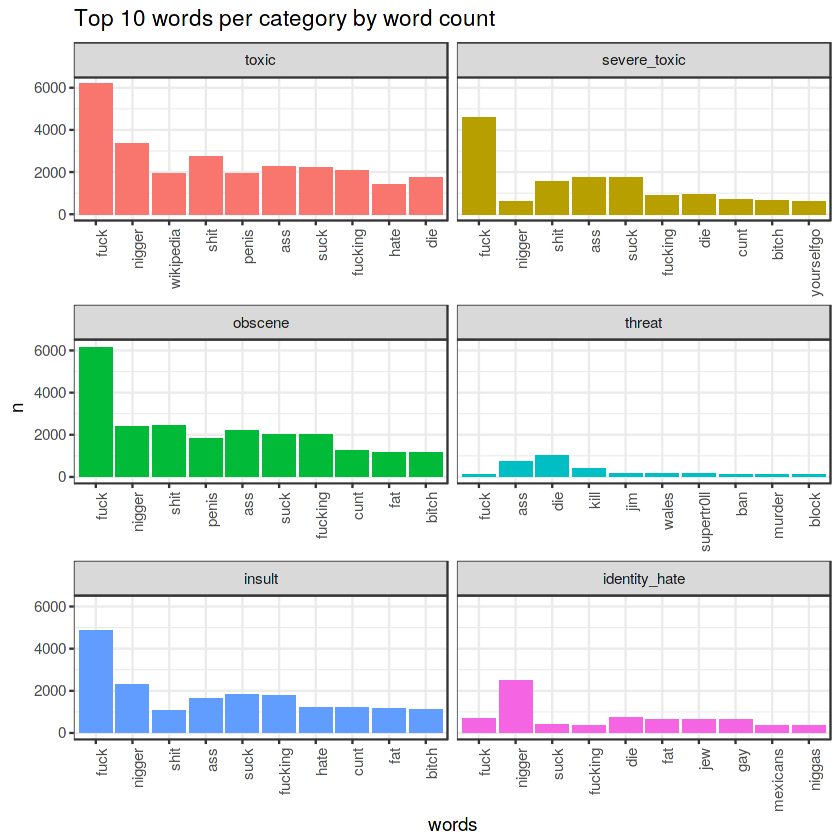

In [69]:
tidy_data %>% 
    group_by(label, word) %>%
    summarize(n = n()) %>%
    top_n(10) %>%
ggplot(aes(x=reorder(word, -n), y = n, fill = label)) + 
geom_bar(stat='identity', show.legend=FALSE) +
facet_wrap(~label, ncol=2, scales = 'free_x') + 
theme_bw()+
theme(axis.text.x = element_text(angle=90, hjust=1)) + 
ggtitle("Top 10 words per category by word count ") + xlab('words')
   



Selecting by pct


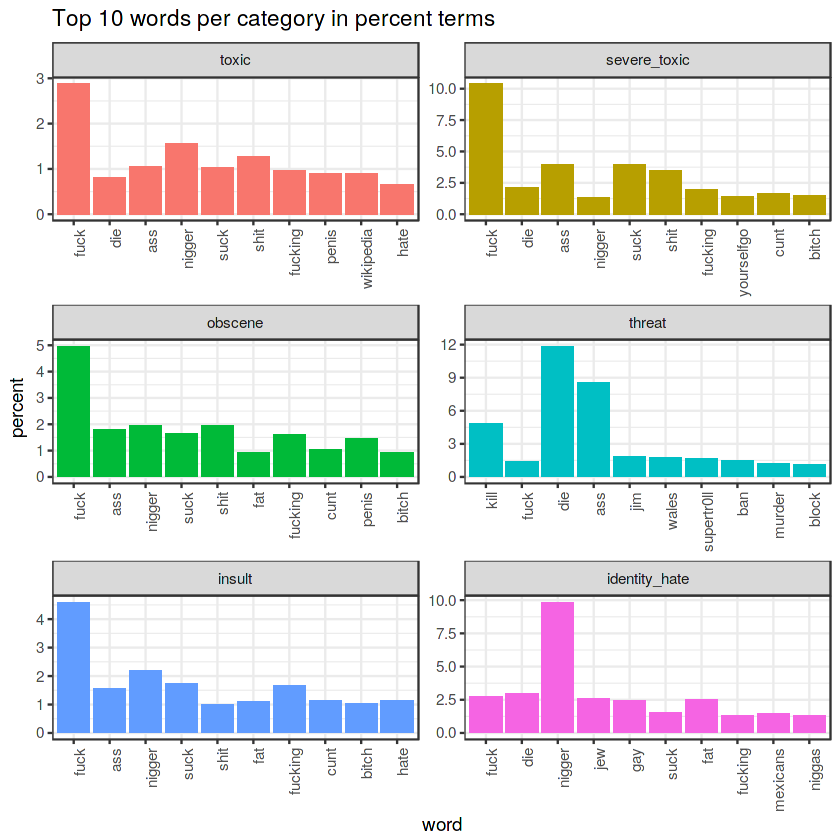

In [70]:
tidy_data %>% 
    group_by(label, word) %>%
    summarize(n = n()) %>%
    mutate(pct =  n/sum(n) * 100) %>%
    top_n(10) %>%
ggplot(aes(x=reorder(word, -pct), y = pct, fill = label)) + 
geom_bar(stat='identity', show.legend=FALSE) +
facet_wrap(~label, ncol=2, scales = 'free')+
theme_bw() + 
theme(axis.text.x = element_text(angle=90, hjust=1)) + 
ggtitle("Top 10 words per category in percent terms ") + 
xlab('word') + 
ylab('percent')



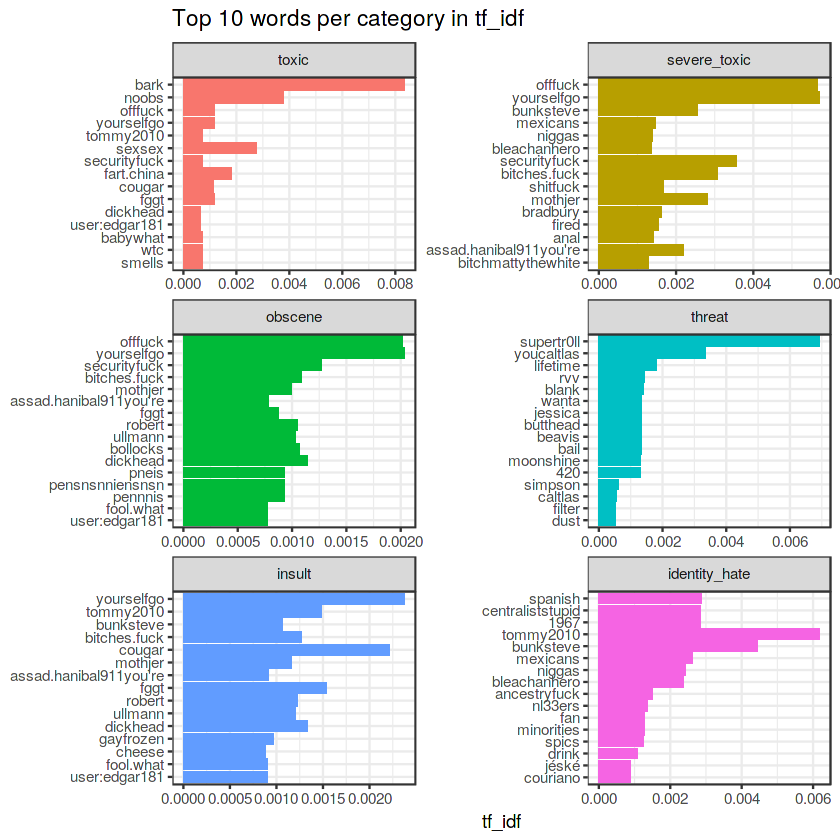

In [75]:
tidy_data %>% 
    group_by(label, word) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    bind_tf_idf(word, label, n) %>%
    select(label, word, tf_idf) %>%
    group_by(label) %>%
    top_n(15, wt=tf_idf) %>%
    ggplot(aes(x=reorder(word, tf_idf), y = tf_idf, fill = label)) + 
        geom_bar(stat='identity', show.legend=FALSE) +
        facet_wrap(~label, ncol=2, scales = 'free')+
        coord_flip() +
        theme_bw() + 
       #theme(axis.text.x = element_text(angle=90, hjust=1)) + 
        ggtitle("Top 10 words per category in tf_idf") + 
        theme(axis.title.y=element_blank())

## Observations on wordcounts

Aside from the obviously ugly material we are dealing with here, a few observations: 
        - From the raw wordcounts, it apperas as if there may be a few ways to distinguish the less frequent topics (threat, identity_hate) from simple word counts, but the main topics (toxic vs obscene) look challenging. 
        - TfIDF reveals that some of the words may be names of individual posters (e.g. assad.hannibal).  That will further complicate any of the typical naive bayes approaches (see below).  
        - Many of these words are outside the typical lexicon used by neural network/ wordvec based programs.  That suggests that we'll need to use character based approaches to deal with OOV tests. 
        

## A quick demonstration below to illustrate how Naive Bayes fails (and it fails miserably!)

In [76]:
set.seed(12345)
library(SnowballC, quietly = TRUE)
library(tm, quiety == TRUE)
library(e1071, quietly = TRUE)
library(caret, quietly = TRUE)


## Set up train/ test splits
train_index <- createDataPartition(train_flat$label, p=0.8, list=FALSE, times=1)
TRAIN <- train_flat[train_index,]
TEST  <- train_flat[-train_index,]

TRAIN_X <- TRAIN$comment_text
TRAIN_Y <- TRAIN$label
TEST_X  <- TEST$comment_text
TEST_Y  <- TEST$label

In [ ]:
## Preprocess data

binarize <- function(x) {
  x <- ifelse(x > 0, "Yes", "No")
}

preprocess <- function(x) {
    corpus <- VCorpus(VectorSource(x))
    dtm <- DocumentTermMatrix(corpus,
                               control = list(tolower=TRUE,
                                              removeNumbers=TRUE,
                                              stopwords=TRUE,
                                              removePunctuation=TRUE,
                                              stemming=TRUE,
                                             weighting = weightTf)) # can also be weightTfIdf))
    
    ## Filter out infrequent words
    freq_words <- findFreqTerms(dtm, 5)    
    dtm <- dtm[,freq_words]
    

    ## binarize for Naive Bayes
    dtm <- apply(dtm, MARGIN=2, binarize)
    return(dtm)
    }

TRAIN_X <- preprocess(TRAIN_X)
TEST_X  <- preprocess(TEST_X)


In [ ]:
clf <- naiveBayes(TRAIN, factor(TRAIN_Y), laplace=0.002)
preds <- predict(clf, factor(TEST_Y))
confusionMatrix(data = preds, TEST_Y)